# Рекурентна нейронна мережа RNN

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D

### Встановлення гіперпараметрів:

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 256
embedding_dim = 32
units = 32

### Завантаження даних:

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


### Передпроцесинг послідовних даних:

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

### Побудова та компіляція моделі

In [5]:
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(units=units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

### Навчання моделі

In [6]:
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

Epoch 1/10
69/69 [==============================] - 52s 675ms/step - loss: 0.6461 - acc: 0.6136 - val_loss: 0.5003 - val_acc: 0.7704
Epoch 2/10
69/69 [==============================] - 42s 607ms/step - loss: 0.4554 - acc: 0.7973 - val_loss: 0.4369 - val_acc: 0.8067
Epoch 3/10
69/69 [==============================] - 41s 597ms/step - loss: 0.3722 - acc: 0.8429 - val_loss: 0.9254 - val_acc: 0.6421
Epoch 4/10
69/69 [==============================] - 41s 596ms/step - loss: 0.3235 - acc: 0.8683 - val_loss: 0.3866 - val_acc: 0.8313
Epoch 5/10
69/69 [==============================] - 40s 579ms/step - loss: 0.2825 - acc: 0.8876 - val_loss: 0.3581 - val_acc: 0.8624
Epoch 6/10
69/69 [==============================] - 40s 577ms/step - loss: 0.2482 - acc: 0.9062 - val_loss: 0.3455 - val_acc: 0.8668
Epoch 7/10
69/69 [==============================] - 40s 577ms/step - loss: 0.2404 - acc: 0.9072 - val_loss: 0.3698 - val_acc: 0.8652
Epoch 8/10
69/69 [==============================] - 39s 561ms/step - 

### Візуалізація результатів

In [7]:
def visualisation(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
    plt.title('Точність тренування і валідації')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
    plt.title('Втрати тренування і валідації')
    plt.legend()

    plt.show()

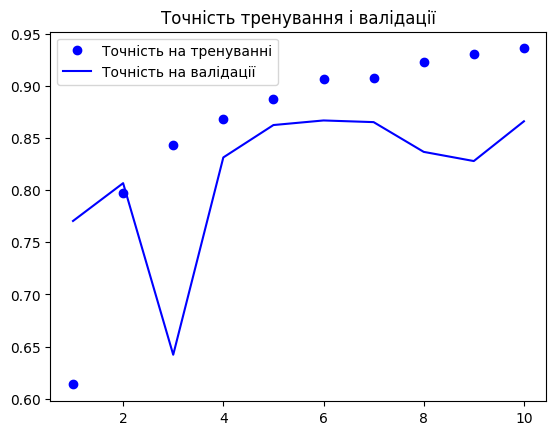

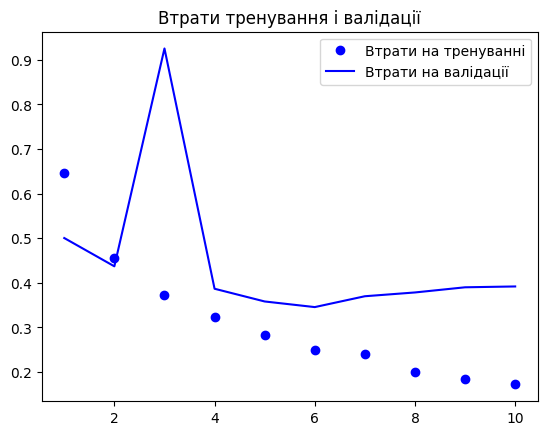

In [8]:
visualisation(history)

### Використання моделі

In [9]:
def prediction(model):
    predictions = model.predict(input_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

In [10]:
prediction(model)

782/782 [==============================] - 28s 36ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 28s 36ms/step - loss: 0.4061 - acc: 0.8591
Test Loss: 0.40610137581825256
Test Accuracy: 0.8591200113296509


# Побудова моделі LSTM

In [11]:
from keras.layers import LSTM

### Побудова та компіляція моделі

In [18]:
model2 = Sequential()

model2.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d_3 (Spati  (None, 500, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Навчання та візуалізація моделі

Epoch 1/10
69/69 [==============================] - 118s 2s/step - loss: 0.6876 - acc: 0.5624 - val_loss: 0.6443 - val_acc: 0.7139
Epoch 2/10
69/69 [==============================] - 111s 2s/step - loss: 0.5482 - acc: 0.7417 - val_loss: 0.4723 - val_acc: 0.7664
Epoch 3/10
69/69 [==============================] - 110s 2s/step - loss: 0.4029 - acc: 0.8287 - val_loss: 0.4002 - val_acc: 0.8393
Epoch 4/10
69/69 [==============================] - 110s 2s/step - loss: 0.3297 - acc: 0.8666 - val_loss: 0.3740 - val_acc: 0.8375
Epoch 5/10
69/69 [==============================] - 114s 2s/step - loss: 0.2907 - acc: 0.8866 - val_loss: 0.3683 - val_acc: 0.8375
Epoch 6/10
69/69 [==============================] - 110s 2s/step - loss: 0.2583 - acc: 0.9014 - val_loss: 0.3022 - val_acc: 0.8744
Epoch 7/10
69/69 [==============================] - 109s 2s/step - loss: 0.2372 - acc: 0.9085 - val_loss: 0.2980 - val_acc: 0.8759
Epoch 8/10
69/69 [==============================] - 111s 2s/step - loss: 0.2148 - a

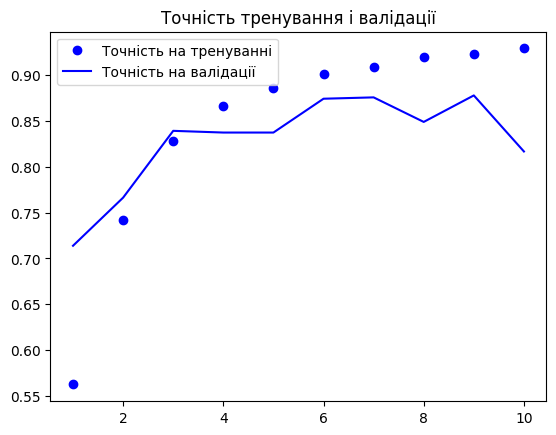

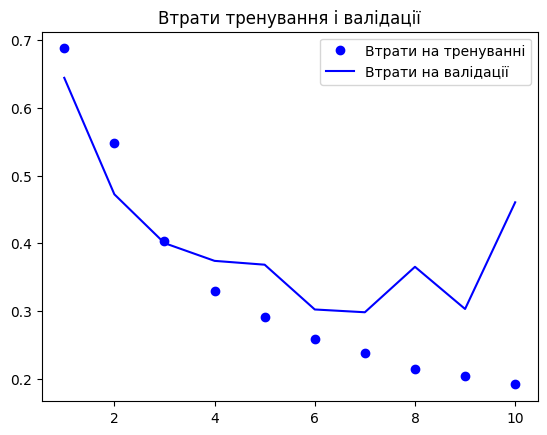

In [13]:
history2 = model2.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history2)

### Прогнозування з використанням навченої моделі

In [14]:
prediction(model2)

782/782 [==============================] - 104s 133ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 106s 136ms/step - loss: 0.4824 - acc: 0.8075
Test Loss: 0.48236778378486633
Test Accuracy: 0.807479977607727


# Побудова моделі BRNN

In [15]:
from keras.layers import Bidirectional

### Побудова та компіляція моделі

In [16]:
model3 = Sequential()

model3.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model3.add(SpatialDropout1D(0.2))
model3.add(Bidirectional(LSTM(32, dropout=0.2)))
model3.add(Dense(1, activation='sigmoid'))

In [17]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 500, 32)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Навчання та візуалізація моделі

Epoch 1/10
69/69 [==============================] - 12s 113ms/step - loss: 0.6917 - acc: 0.5265 - val_loss: 0.6876 - val_acc: 0.5557
Epoch 2/10
69/69 [==============================] - 7s 99ms/step - loss: 0.6029 - acc: 0.6885 - val_loss: 0.4864 - val_acc: 0.7865
Epoch 3/10
69/69 [==============================] - 6s 83ms/step - loss: 0.4383 - acc: 0.8118 - val_loss: 0.4390 - val_acc: 0.7988
Epoch 4/10
69/69 [==============================] - 6s 89ms/step - loss: 0.3535 - acc: 0.8563 - val_loss: 0.3360 - val_acc: 0.8617
Epoch 5/10
69/69 [==============================] - 5s 77ms/step - loss: 0.2982 - acc: 0.8846 - val_loss: 0.3250 - val_acc: 0.8705
Epoch 6/10
69/69 [==============================] - 5s 70ms/step - loss: 0.2675 - acc: 0.8964 - val_loss: 0.4419 - val_acc: 0.8503
Epoch 7/10
69/69 [==============================] - 5s 74ms/step - loss: 0.2385 - acc: 0.9091 - val_loss: 0.3645 - val_acc: 0.8692
Epoch 8/10
69/69 [==============================] - 4s 58ms/step - loss: 0.2248 -

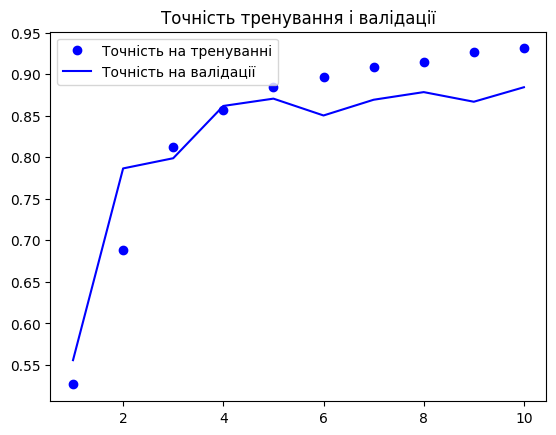

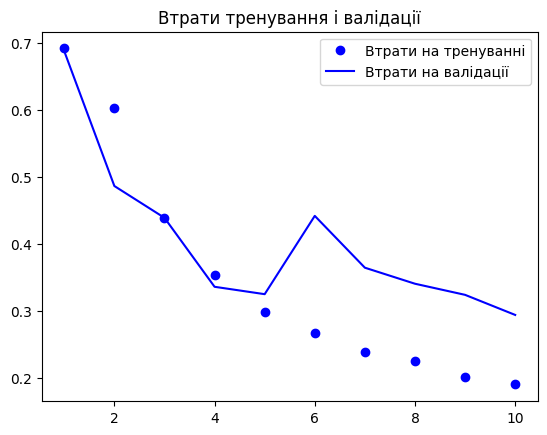

In [19]:
history3 = model3.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history3)

### Прогнозування з використанням навченої моделі

In [20]:
prediction(model3)

782/782 [==============================] - 11s 13ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 11s 14ms/step - loss: 0.3067 - acc: 0.8768
Test Loss: 0.30670779943466187
Test Accuracy: 0.8767600059509277


# Побудова моделі DRNN

### Побудова та компіляція моделі

In [21]:
model4 = Sequential()

model4.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model4.add(SpatialDropout1D(0.2))

model4.add(Bidirectional(LSTM(32, dropout=0.2, return_sequences=True)))
model4.add(Bidirectional(LSTM(32, dropout=0.2)))

model4.add(Dense(1, activation='sigmoid'))

In [22]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           320000    
                                                                 
 spatial_dropout1d_4 (Spati  (None, 500, 32)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 500, 64)           16640     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                      

### Навчання та візуалізація моделі

Epoch 1/10
69/69 [==============================] - 17s 164ms/step - loss: 0.6924 - acc: 0.5167 - val_loss: 0.6886 - val_acc: 0.5505
Epoch 2/10
69/69 [==============================] - 9s 136ms/step - loss: 0.5741 - acc: 0.7012 - val_loss: 0.4314 - val_acc: 0.8157
Epoch 3/10
69/69 [==============================] - 9s 126ms/step - loss: 0.3969 - acc: 0.8317 - val_loss: 0.4360 - val_acc: 0.8073
Epoch 4/10
69/69 [==============================] - 8s 120ms/step - loss: 0.3214 - acc: 0.8685 - val_loss: 0.3355 - val_acc: 0.8591
Epoch 5/10
69/69 [==============================] - 8s 111ms/step - loss: 0.2715 - acc: 0.8941 - val_loss: 0.3102 - val_acc: 0.8772
Epoch 6/10
69/69 [==============================] - 8s 113ms/step - loss: 0.2373 - acc: 0.9098 - val_loss: 0.2921 - val_acc: 0.8823
Epoch 7/10
69/69 [==============================] - 7s 106ms/step - loss: 0.2173 - acc: 0.9191 - val_loss: 0.3071 - val_acc: 0.8755
Epoch 8/10
69/69 [==============================] - 8s 116ms/step - loss: 0

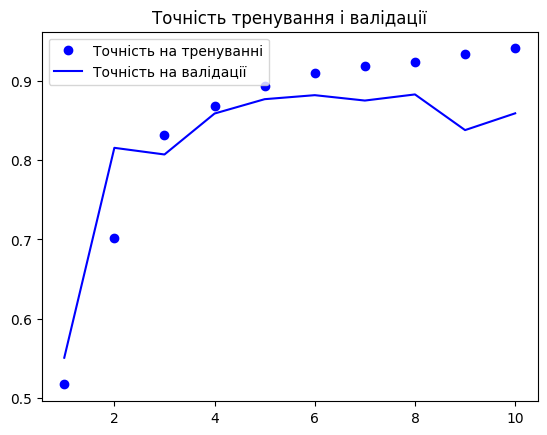

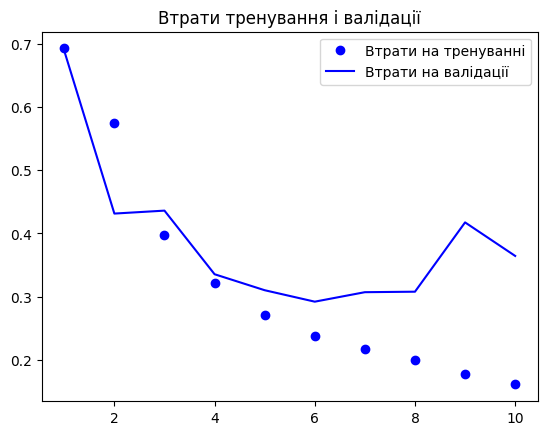

In [23]:
history4 = model4.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history4)

### Прогнозування з використанням навченої моделі

In [24]:
prediction(model4)

782/782 [==============================] - 20s 24ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 20s 25ms/step - loss: 0.3770 - acc: 0.8537
Test Loss: 0.3769719898700714
Test Accuracy: 0.8536800146102905


## Графіки

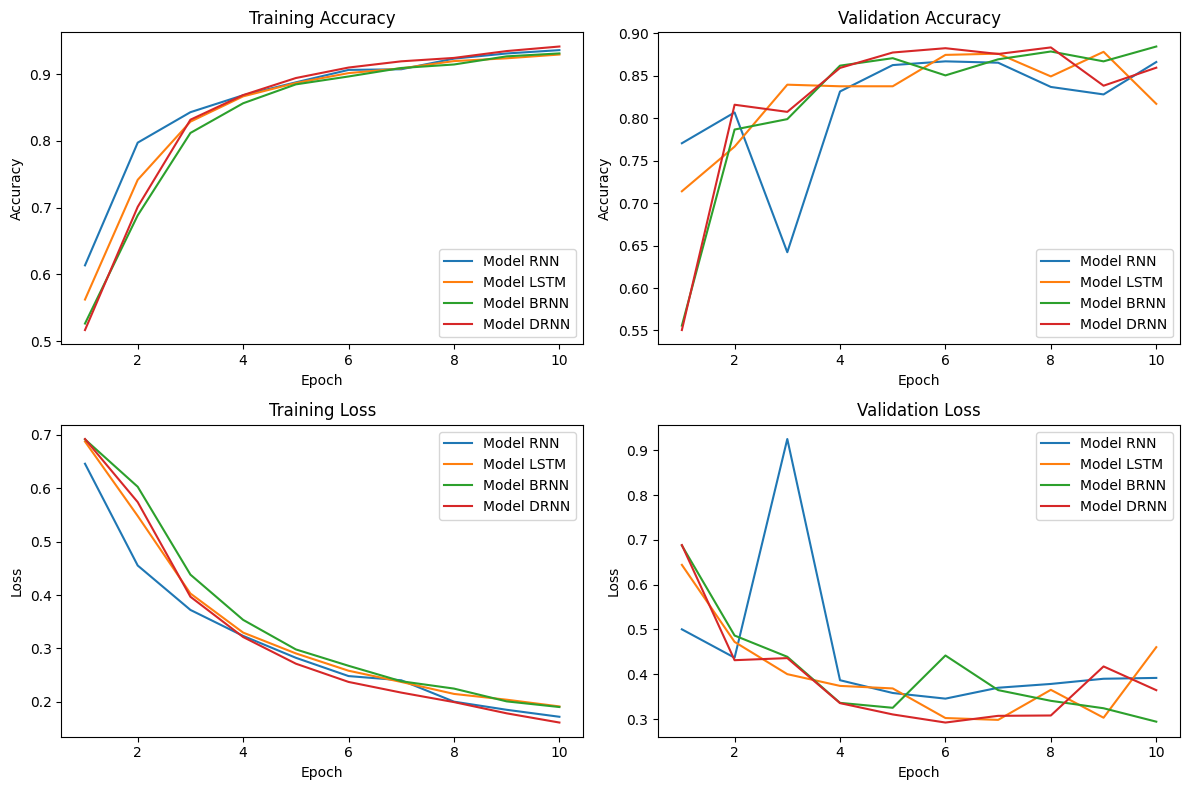

In [25]:
epochs = range(1, len(history.history['acc']) + 1)
epochs2 = range(1, len(history2.history['acc']) + 1)
epochs3 = range(1, len(history3.history['acc']) + 1)
epochs4 = range(1, len(history4.history['acc']) + 1)

# Створення сітки графіків 2x2
plt.figure(figsize=(12, 8))

# Графік 1: Точність на тренувальних данних
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['acc'], label='Model RNN')
plt.plot(epochs2, history2.history['acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['acc'], label='Model DRNN')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 2: Точність на валідаційних данних
plt.subplot(2, 2, 2)
plt.plot(epochs, history.history['val_acc'], label='Model RNN')
plt.plot(epochs2, history2.history['val_acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_acc'], label='Model DRNN')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 3: Втрати на тренувальних данних
plt.subplot(2, 2, 3)
plt.plot(epochs, history.history['loss'], label='Model RNN')
plt.plot(epochs2, history2.history['loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['loss'], label='Model DRNN')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Графік 4: Втрати на валідаційних данних
plt.subplot(2, 2, 4)
plt.plot(epochs, history.history['val_loss'], label='Model RNN')
plt.plot(epochs2, history2.history['val_loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_loss'], label='Model DRNN')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Висновки:

Ми побудували 4 моделі, показники яких на тестових даних подані у таблиці:

| Модель | Точність | Втрати |
|--------|----------|--------|
| RNN    | 85.91%   | 40.61% |
| LSTM   | 80.75%   | 48.24% |
| BRNN   | 87.68%   | 30.67% |
| DBRR   | 85.37%   | 37.7%  |

На основі отриманих результатів можна зробити наступні висновки:

- BRNN (Bidirectional RNN) виявилася найефективнішою моделлю серед всіх чотирьох, досягнувши найвищої точності 87.68% та найнижчих втрат 30.67%. Це свідчить про те, що використання двонаправленої рекурентної нейронної мережі допомагає краще враховувати контекст даних у обох напрямках, що покращує продуктивність.

- RNN (Simple Recurrent Neural Network) показала пристойні результати з точністю 85.91% та втратами 40.61%. Проте, вона поступається за точністю та втратами моделі BRNN, що свідчить про те, що однонаправлена RNN має обмежені можливості в обробці складних послідовних даних.

- DBRR (Deep Bidirectional Recurrent Network), хоча і є глибокою двонаправленою рекурентною мережею, показала трохи гірші результати порівняно з BRNN. Це може бути пов'язано з тим, що збільшення глибини мережі не завжди призводить до покращення продуктивності, особливо без належної регуляризації та налаштування гіперпараметрів.

- LSTM (Long Short-Term Memory) модель показала найнижчі результати серед всіх чотирьох з точністю 80.75% та втратами 48.24%. Хоча LSTM добре підходять для обробки послідовних даних і збереження довготривалих залежностей, у даному випадку, можливо, знадобиться додаткова настройка або зміна архітектури, щоб покращити її продуктивність.